<a href="https://colab.research.google.com/github/SonuYohannan412/SonuYohannan412/blob/main/PROJECT_ZILLOW_HOME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

IMPORTING THE DATA

In [ ]:
from google.colab import files
files.upload()

In [ ]:
zw = load_csv('')

READING THE DATASET

DATA ANALYSIS

In [ ]:
zw.shape

(20640, 10)

In [ ]:
zw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
zw.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
zw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
zw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


CHECK FOR NULL VALUE

In [ ]:
zw.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
zw.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
zw.dropna(inplace=True)

In [ ]:
zw.fillna(method='ffill',axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


DISTPLOT

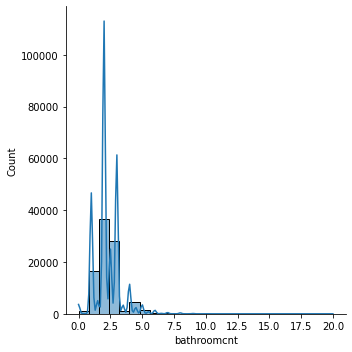

In [ ]:
sns.displot(x="bathroomcnt",data=zw,bins=25,kde=True)

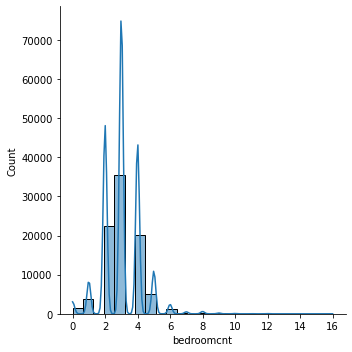

In [ ]:
sns.displot(x="bedroomcnt",data=zw,bins=25,kde=True)

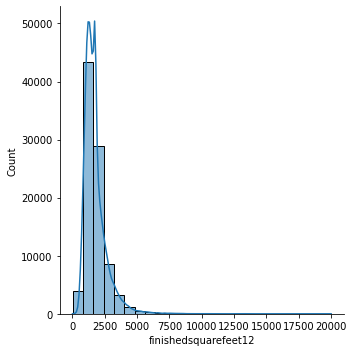

In [ ]:
sns.displot(x="finishedsquarefeet12",data=zw,bins=25,kde=True)

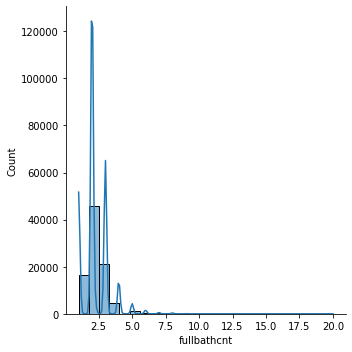

In [ ]:
sns.displot(x="fullbathcnt",data=zw,bins=25,kde=True)

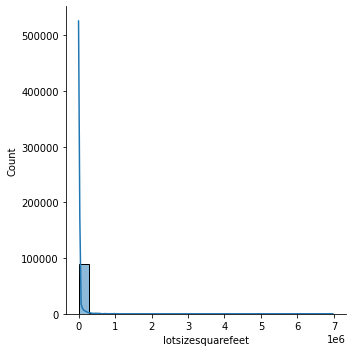

In [ ]:
sns.displot(x="lotsizesquarefeet",data=zw,bins=25,kde=True)

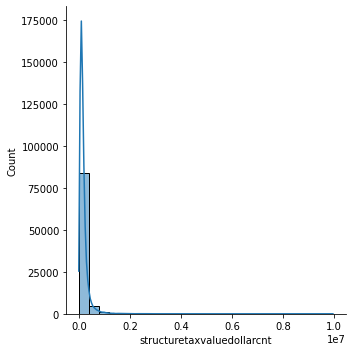

In [ ]:
sns.displot(x="structuretaxvaluedollarcnt",data=zw,bins=25,kde=True)

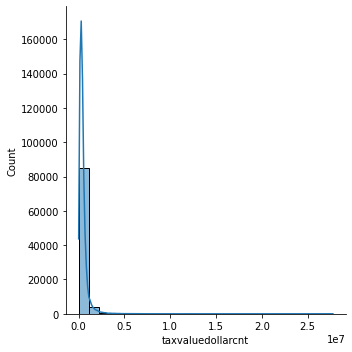

In [ ]:
sns.displot(x="taxvaluedollarcnt",data=zw,bins=25,kde=True)

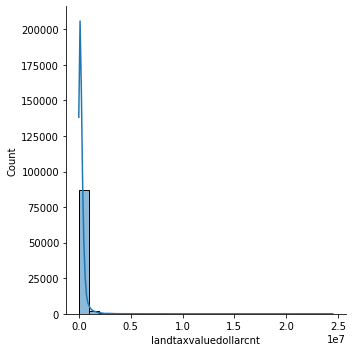

In [ ]:
sns.displot(x="landtaxvaluedollarcnt",data=zw,bins=25,kde=True)

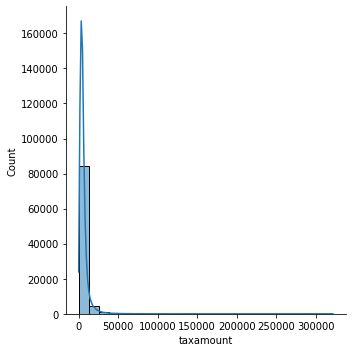

In [ ]:
sns.displot(x="taxamount",data=zw,bins=25,kde=True)

CHECK FOR OUTLIERS

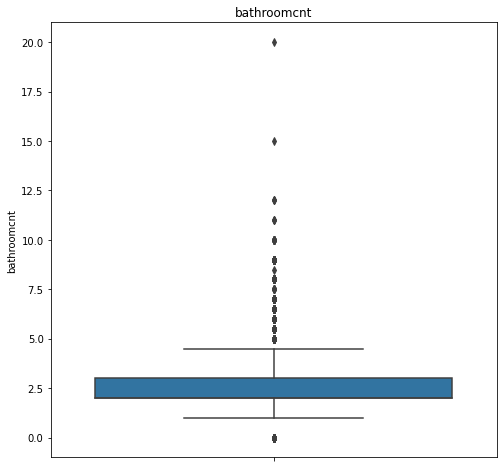

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='bathroomcnt',data=zw)
plt.title('bathroomcnt')
plt.show()

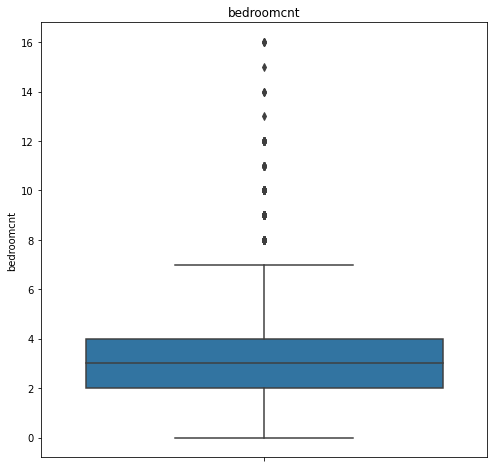

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='bedroomcnt',data=zw)
plt.title('bedroomcnt')
plt.show()

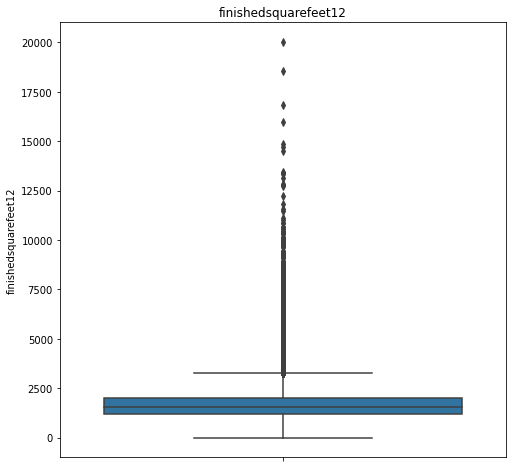

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='finishedsquarefeet12',data=zw)
plt.title('finishedsquarefeet12')
plt.show()

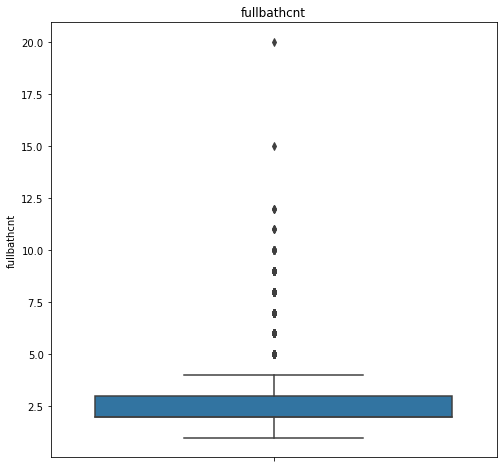

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='fullbathcnt',data=zw)
plt.title('fullbathcnt')
plt.show()

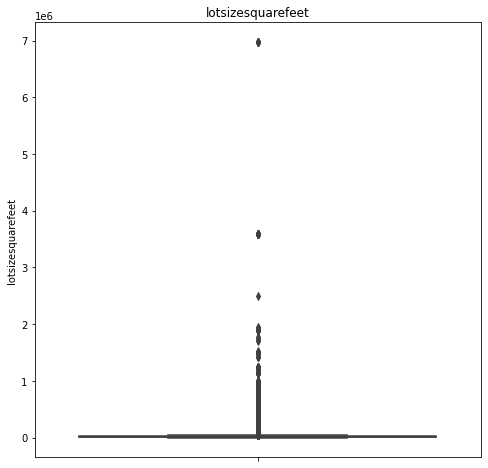

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='lotsizesquarefeet',data=zw)
plt.title('lotsizesquarefeet')
plt.show()

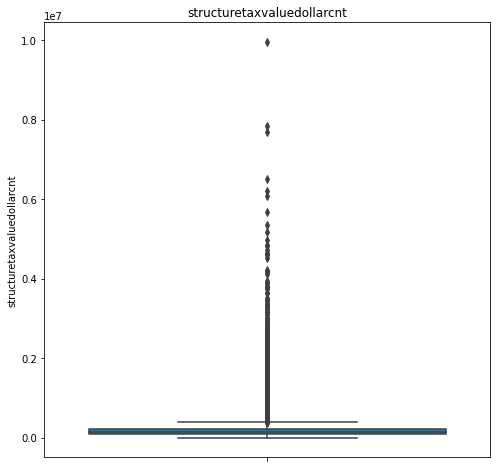

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='structuretaxvaluedollarcnt',data=zw)
plt.title('structuretaxvaluedollarcnt')
plt.show()

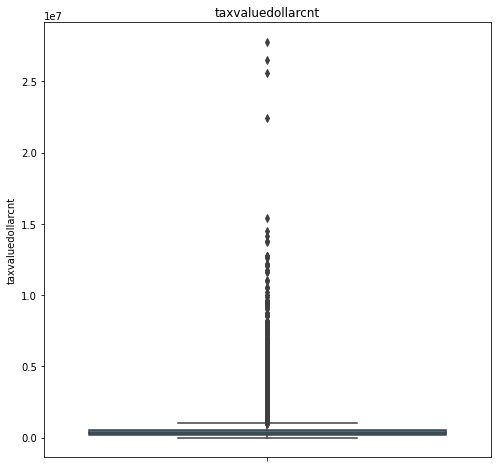

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='taxvaluedollarcnt',data=zw)
plt.title('taxvaluedollarcnt')
plt.show()

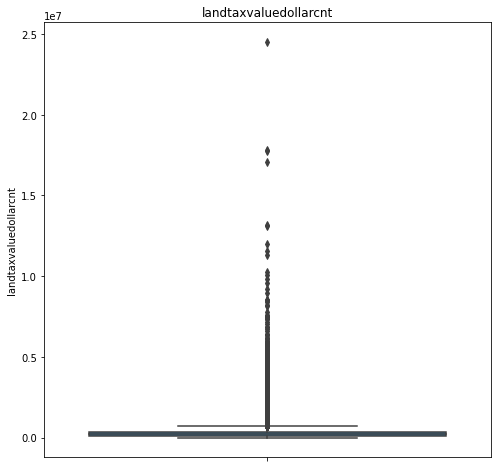

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='landtaxvaluedollarcnt',data=zw)
plt.title('landtaxvaluedollarcnt')
plt.show()

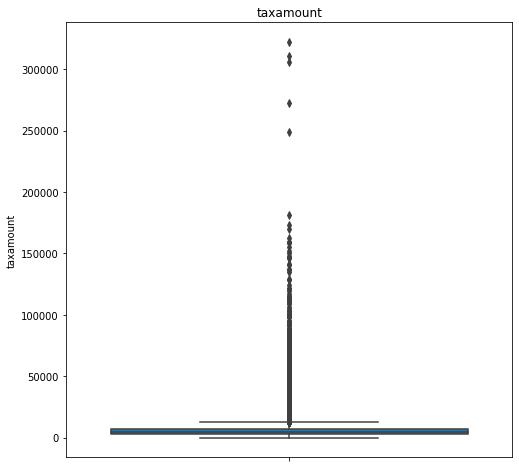

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='taxamount',data=zw)
plt.title('taxamount')
plt.show()

CLEARING THE OUTLIER WITH WINSORIZE METHOD

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
zw['bathroomcnt']=winsorize(zw['bathroomcnt'],limits=[0.05,0.20])
print('winsorize data:',zw['bathroomcnt'])

winsorize data: 0        3.0
1        3.0
2        2.0
3        2.0
4        2.0
        ... 
90145    2.5
90146    2.0
90147    2.0
90148    2.0
90149    2.5
Name: bathroomcnt, Length: 90150, dtype: float64


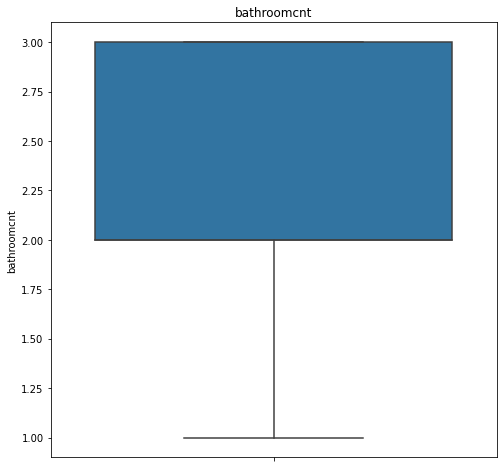

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='bathroomcnt',data=zw)
plt.title('bathroomcnt')
plt.show()

In [ ]:
zw['bedroomcnt']=winsorize(zw['bedroomcnt'],limits=[0.05,0.20])
print('winsorize data:',zw['bedroomcnt'])

winsorize data: 0        4
1        3
2        3
3        4
4        4
        ..
90145    4
90146    4
90147    4
90148    3
90149    4
Name: bedroomcnt, Length: 90150, dtype: int64


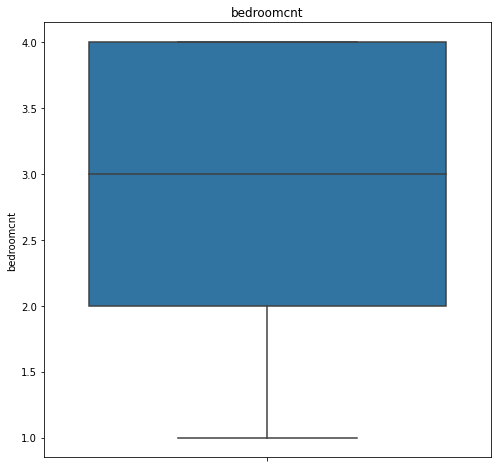

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='bedroomcnt',data=zw)
plt.title('bedroomcnt')
plt.show()

In [ ]:
zw['finishedsquarefeet12']=winsorize(zw['finishedsquarefeet12'],limits=[0.05,0.20])
print('winsorize data:',zw['finishedsquarefeet12'])

winsorize data: 0        2199.0
1        1589.0
2        2199.0
3        2199.0
4        1882.0
          ...  
90145    2199.0
90146    1566.0
90147    2199.0
90148    1650.0
90149    1946.0
Name: finishedsquarefeet12, Length: 90150, dtype: float64


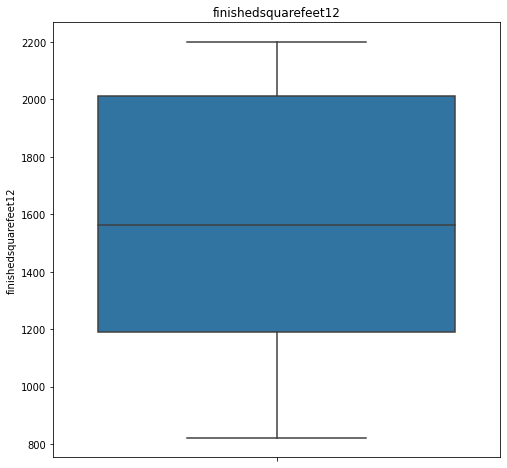

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='finishedsquarefeet12',data=zw)
plt.title('finishedsquarefeet12')
plt.show()

In [ ]:
zw['fullbathcnt']=winsorize(zw['fullbathcnt'],limits=[0.05,0.20])
print('winsorize data:',zw['bedroomcnt'])

winsorize data: 0        4
1        3
2        3
3        4
4        4
        ..
90145    4
90146    4
90147    4
90148    3
90149    4
Name: bedroomcnt, Length: 90150, dtype: int64


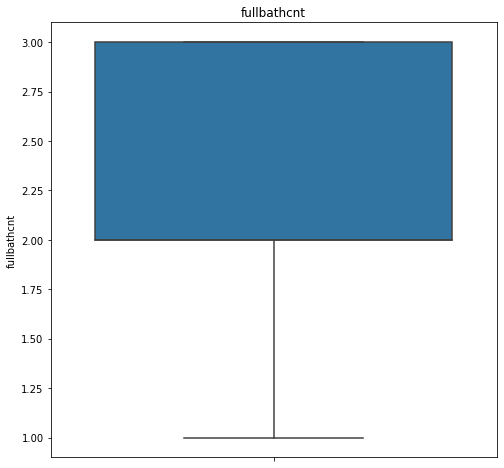

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='fullbathcnt',data=zw)
plt.title('fullbathcnt')
plt.show()

<AxesSubplot:ylabel='count'>

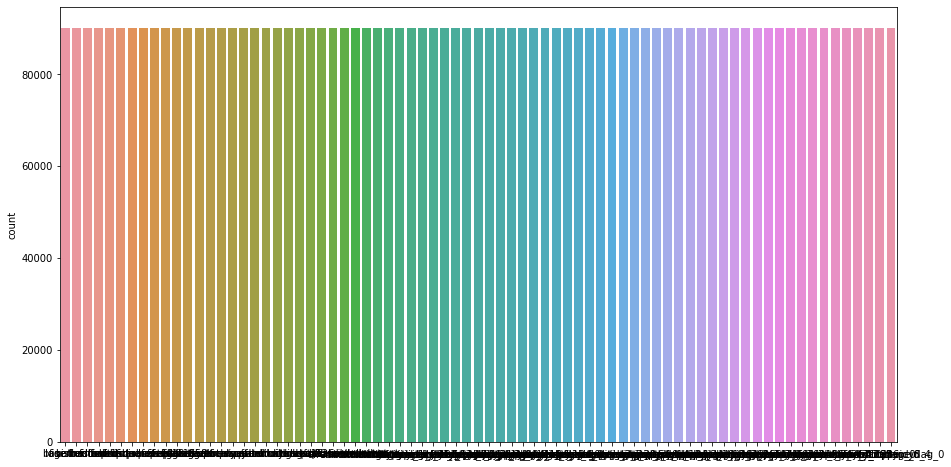

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=zw)

SPLITING THE DATA

In [ ]:
X=zw.drop(['logerror','taxamount'],axis=1)
print(X)

       basementsqft  bathroomcnt  bedroomcnt  finishedfloor1squarefeet  \
0        713.581395          3.0           4               1347.720146   
1        713.581395          3.0           3               1347.720146   
2        713.581395          2.0           3               1347.720146   
3        713.581395          2.0           4               1347.720146   
4        713.581395          2.0           4               1347.720146   
...             ...          ...         ...                       ...   
90145    713.581395          2.5           4               1279.000000   
90146    713.581395          2.0           4               1566.000000   
90147    713.581395          2.0           4               1612.000000   
90148    713.581395          2.0           3               1650.000000   
90149    713.581395          2.5           4                981.000000   

       finishedsquarefeet12  finishedsquarefeet13  finishedsquarefeet15  \
0                    2199.0         

In [ ]:
Y=zw['taxamount']
print(Y)

0        7219.18
1        6901.09
2        4876.61
3        5560.07
4        4878.25
          ...   
90145    6314.44
90146    2853.08
90147    2345.04
90148    3248.82
90149    7542.12
Name: taxamount, Length: 90150, dtype: float64


STANDARDIZING THE DATA

In [ ]:
Scaler=StandardScaler()

In [ ]:
Scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data=Scaler.transform(X)
print(standardized_data)

[[ 0.          1.19695777  1.20565967 ...  0.00576879  0.04946056
   0.14172108]
 [ 0.          1.19695777  0.07316317 ...  0.00576879  0.04946056
   0.14172108]
 [ 0.         -0.23545421  0.07316317 ...  0.00576879  0.04946056
   0.14172108]
 ...
 [ 0.         -0.23545421  1.20565967 ...  0.00576879  0.04946056
   0.14172108]
 [ 0.         -0.23545421  0.07316317 ...  0.00576879  0.04946056
   0.14172108]
 [ 0.          0.48075178  1.20565967 ...  0.00576879  0.04946056
   0.14172108]]


In [ ]:
X=standardized_data

TRAINING THE DATASET

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train)
print(Y_train)

[[ 0.         -0.23545421 -1.05933333 ...  0.00576879  0.04946056
   0.14172108]
 [ 0.         -0.23545421  0.07316317 ...  0.00576879  0.04946056
   0.14172108]
 [ 0.          1.19695777  1.20565967 ...  0.00576879  0.04946056
   0.14172108]
 ...
 [ 0.         -1.66786619 -2.19182983 ...  0.00576879  0.04946056
   0.14172108]
 [ 0.          0.48075178  0.07316317 ...  0.00576879  0.04946056
   0.14172108]
 [ 0.          1.19695777  1.20565967 ...  0.00576879  0.04946056
   0.14172108]]
47133     4120.50
65505     4832.54
3137     13693.66
44246     5645.97
76717     2529.54
           ...   
84434     7645.70
31019     2992.49
44566     4981.34
72173     6645.20
89256     8760.66
Name: taxamount, Length: 72120, dtype: float64


CORRELATION AND HEATMAP

In [ ]:
correlation=zw.corr()
print(correlation)

                          logerror  basementsqft  bathroomcnt  bedroomcnt  \
logerror                  1.000000  5.915197e-03     0.022851    0.024599   
basementsqft              0.005915  1.000000e+00     0.007670    0.010725   
bathroomcnt               0.022851  7.670334e-03     1.000000    0.567839   
bedroomcnt                0.024599  1.072489e-02     0.567839    1.000000   
finishedfloor1squarefeet  0.006767  1.675305e-02     0.073749    0.104701   
...                            ...           ...          ...         ...   
regionidcounty_1286       0.010616  5.267170e-14     0.015668    0.051308   
typeconstructiontypeid_6  0.000950 -7.297983e-17    -0.002796   -0.002323   
typeconstructiontypeid_4 -0.000459 -7.646961e-16     0.001358    0.001756   
fireplaceflag_0          -0.001098  5.406340e-16     0.005688    0.026680   
taxdelinquencyflag_0     -0.018946  1.079121e-15     0.042976    0.010880   

                          finishedfloor1squarefeet  finishedsquarefeet12  \

<AxesSubplot:>

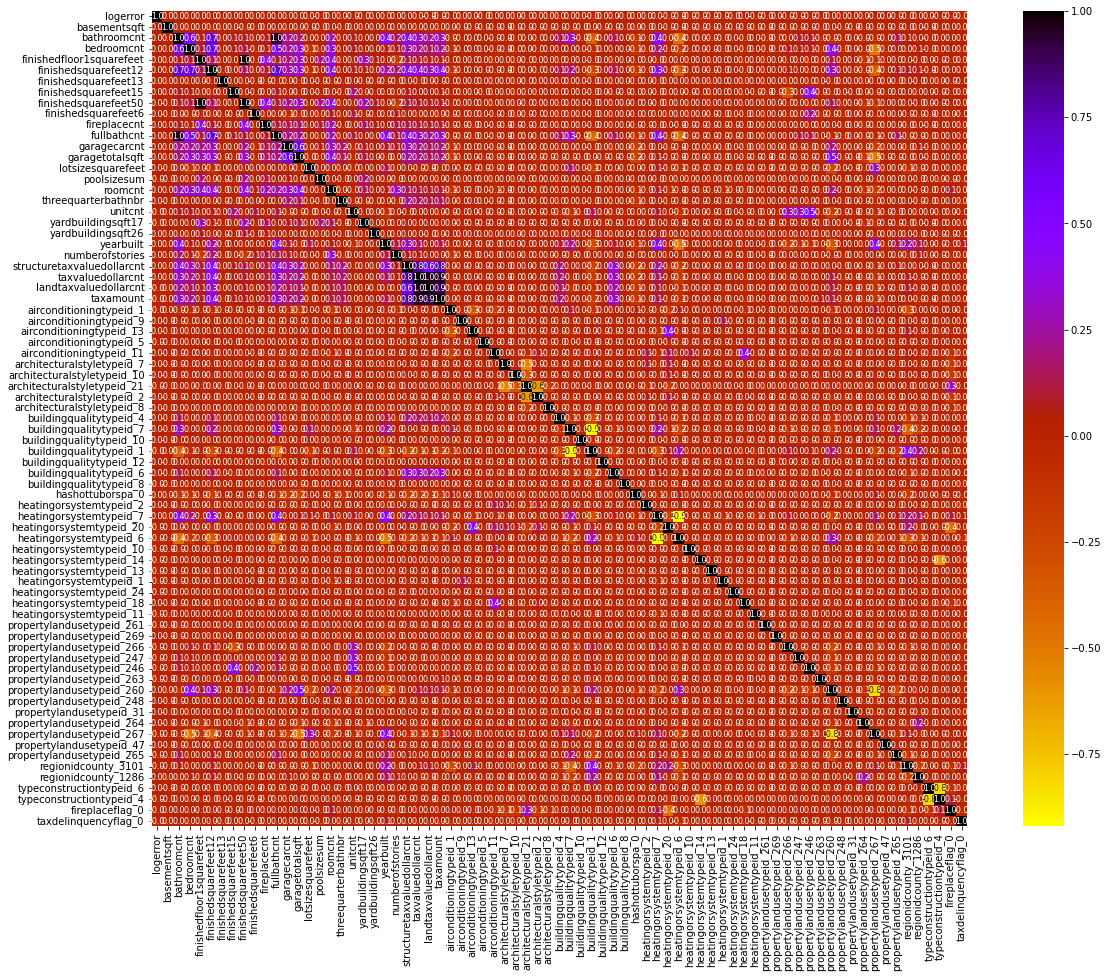

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation,cbar=True,square=True,cmap="gnuplot_r",annot=True,annot_kws={'size':8},fmt='.1f')

MODEL PREDICTION AND ACCURACY

In [ ]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)
print('accuracy of linear regression on training data:{:2f}'.format(linreg.score(X_train,Y_train)))
print('accuracy of linear regression on test data:{:2f}'.format(linreg.score(X_test,Y_test)))

accuracy of linear regression on training data:0.914190
accuracy of linear regression on test data:-8496152739013532319744.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction=regressor.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.8792619569424406


PREDICTION ON THE BASIS OF RANDOM FOREST CLASSIFIER

In [ ]:
input_data=(713.581395348837,3,4,1347.7201459854,2538,1404.54545454545,2380.88073136428,1355.29941605839,2293.0692124105,1.18787120975305,3,1.81205472120949,345.539619359802,11012,519.688405797102,6.48758882507544,1.00875291763921,1,310.204914933837,311.694736842105,1978,1.44079844206426,245180,567112,321932,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)

[296377.9189]


**THE VALUE OF ZILLOW HOME ON THE BASIS OF THIS DATASET IS 296377.91**